In [1]:
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import matplotlib.pyplot as plt
import re

/Users/Lesley/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Data Exploration

In [2]:
training = pd.read_csv('./data/train.csv')
testing = pd.read_csv('./data/test.csv')
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [3]:
print "Dimension of train data {}".format(training.shape)
print "Dimension of test data {}".format(testing.shape)
print "Training Set"
training.info()
print 
print training.describe()
print
print "Testing Set"
testing.info()
print 
print testing.describe()


Dimension of train data (891, 12)
Dimension of test data (418, 11)
Training Set
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000

In [4]:
keys = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']
print "Training Set"
for item in keys:
    if item != 'Fare' and item != 'Age':
        print "Feature %s"%item, set(training[item])
print "Testing Set"
for item in keys:
    if item != 'Fare' and item != 'Age':
        print "Feature %s"%item, set(testing[item])
print
print training.Survived.value_counts()

Training Set
Feature Pclass set([1, 2, 3])
Feature Sex set(['male', 'female'])
Feature SibSp set([0, 1, 2, 3, 4, 5, 8])
Feature Parch set([0, 1, 2, 3, 4, 5, 6])
Feature Cabin set([nan, 'C78', 'D17', 'D50', 'E77', 'C30', 'D56', 'C32', 'G6', 'B50', 'C62 C64', 'D', 'B102', 'B101', 'E68', 'F33', 'T', 'F38', 'A24', 'E63', 'E67', 'B28', 'B22', 'B20', 'B4', 'B5', 'B58 B60', 'B3', 'F G73', 'C54', 'C52', 'C50', 'C46', 'F E69', 'E58', 'E50', 'D28', 'B38', 'B39', 'B35', 'B37', 'B30', 'E121', 'B71', 'E8', 'F G63', 'C45', 'E40', 'C47', 'E46', 'E44', 'B80', 'E49', 'C49', 'B86', 'B82 B84', 'C23 C25 C27', 'D48', 'C104', 'C106', 'C101', 'C103', 'D15', 'E34', 'E33', 'D11', 'E31', 'C70', 'B94', 'D19', 'E38', 'E36', 'B18', 'B19', 'D37', 'A32', 'A31', 'A36', 'A34', 'E101', 'C118', 'C2', 'C7', 'C111', 'C110', 'E24', 'E25', 'E12', 'B57 B59 B63 B66', 'C68', 'D21', 'D20', 'C65', 'D26', 'E17', 'A20', 'F2', 'A23', 'F4', 'A26', 'B69', 'B42', 'C128', 'C123', 'C126', 'C124', 'C125', 'B51 B53 B55', 'D36', 'E10', 'D3

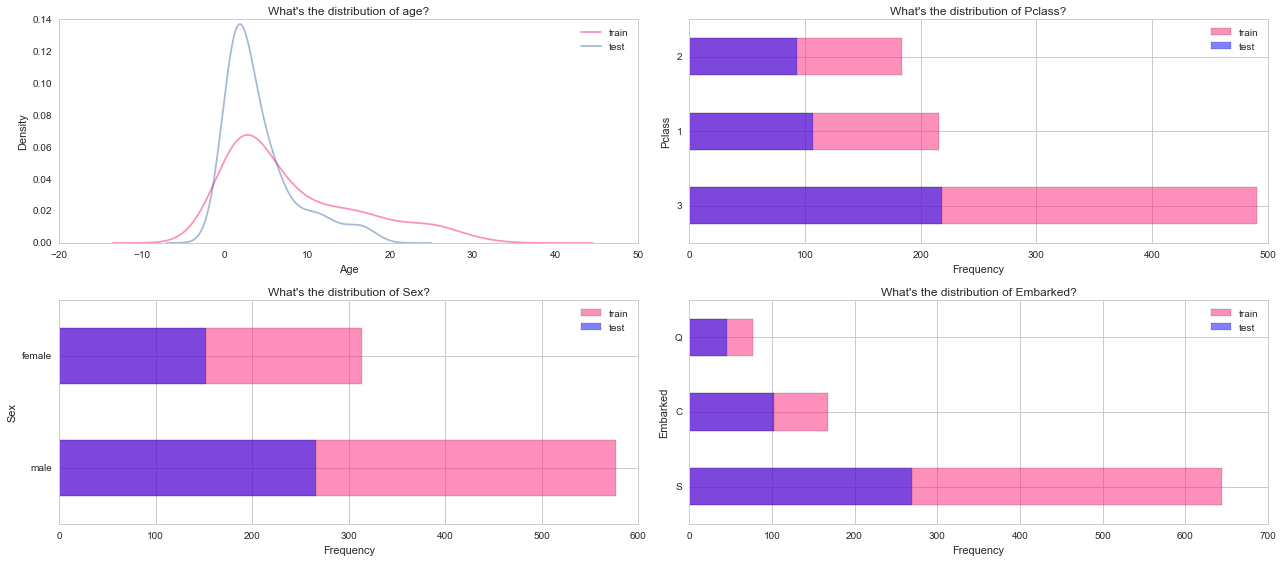

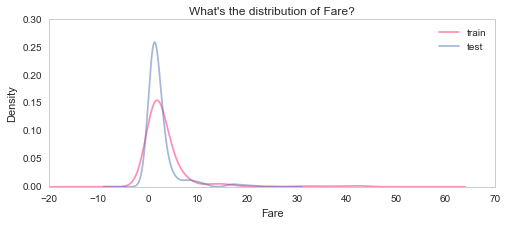

In [3]:
'''
alpha for transparency
plt.subplot(i,j,z) => plt.subplot2grid((i,j), (a,b))
i: rownum j:colnum z:figurenum

kind: kde -> density plot
'''
plt.rc('font', size=13)
fig = plt.figure(figsize=(18, 8))
alpha = 0.5

ax1 = plt.subplot2grid((2,2),(0,0))
training.Age.value_counts().plot(kind='kde', color='#FA2379', label='train', alpha=alpha)
testing.Age.value_counts().plot(kind='kde', label='test', alpha=alpha)
ax1.set_xlabel('Age')
ax1.set_title("What's the distribution of age?" )
ax1.grid()
plt.legend(loc='best')

ax2 = plt.subplot2grid((2,2), (0,1))
training.Pclass.value_counts().plot(kind='barh', color='#FA2379', label='train', alpha=alpha)
testing.Pclass.value_counts().plot(kind='barh', label='test', alpha=alpha)
ax2.set_ylabel('Pclass')
ax2.set_xlabel('Frequency')
ax2.set_title("What's the distribution of Pclass?" )
plt.legend(loc='best')

ax3 = plt.subplot2grid((2,2), (1,0))
training.Sex.value_counts().plot(kind='barh', color='#FA2379', label='train', alpha=alpha)
testing.Sex.value_counts().plot(kind='barh', label='test', alpha=alpha)
ax3.set_ylabel('Sex')
ax3.set_xlabel('Frequency')
ax3.set_title("What's the distribution of Sex?" )
plt.legend(loc='best')

ax4 = plt.subplot2grid((2,2), (1,1))
training.Embarked.value_counts().plot(kind='barh', color='#FA2379', label='train', alpha=alpha)
testing.Embarked.value_counts().plot(kind='barh', label='test', alpha=alpha)
ax4.set_ylabel('Embarked')
ax4.set_xlabel('Frequency')
ax4.set_title("What's the distribution of Embarked?" )
plt.legend(loc='best')
plt.tight_layout()

fig2 = plt.figure(figsize=(8, 3))
training.Fare.value_counts().plot(kind='kde', color='#FA2379', label='train', alpha=alpha)
testing.Fare.value_counts().plot(kind='kde', label='test', alpha=alpha)
plt.xlabel('Fare')
plt.title("What's the distribution of Fare?" )
plt.grid()
plt.legend(loc='best')

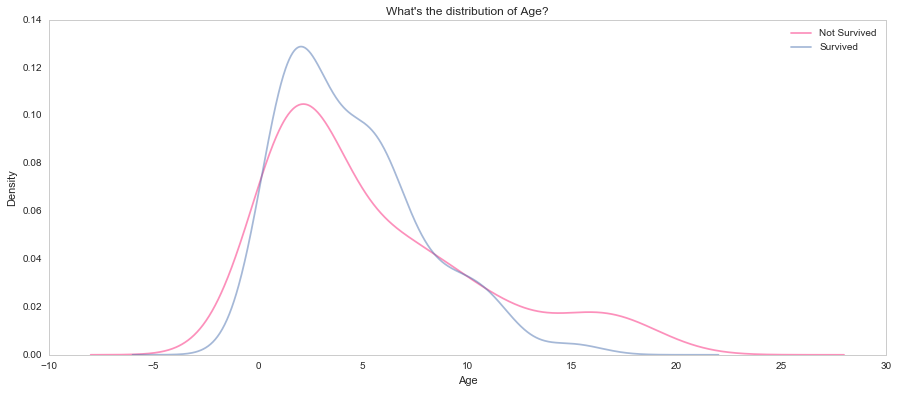

In [6]:
#Age vs Survival
fig = plt.figure(figsize=(15, 6))

training[training.Survived==0].Age.value_counts().plot(kind='density', color='#FA2379', label='Not Survived', alpha=alpha)
training[training.Survived==1].Age.value_counts().plot(kind='density', label='Survived', alpha=alpha)
plt.xlabel('Age')
plt.title("What's the distribution of Age?" )
plt.legend(loc='best')
plt.grid()

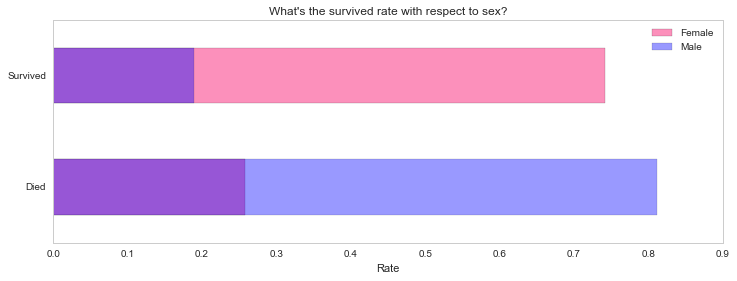

In [7]:
#sex vs survival
df_male = training[training.Sex=='male'].Survived.value_counts().sort_index()
df_female = training[training.Sex=='female'].Survived.value_counts().sort_index()
fig = plt.figure(figsize=(12, 4))

(df_female/training[training.Sex=='female'].shape[0]).plot(kind='barh', color='#FA2379', label='Female', alpha=alpha)
(df_male/training[training.Sex=='male'].shape[0]).plot(kind='barh', label='Male', alpha=alpha-0.1)
plt.xlabel('Rate')

plt.yticks([0, 1], ['Died', 'Survived'])
plt.title("What's the survived rate with respect to sex?" )
plt.legend(loc='best')
plt.grid()
 

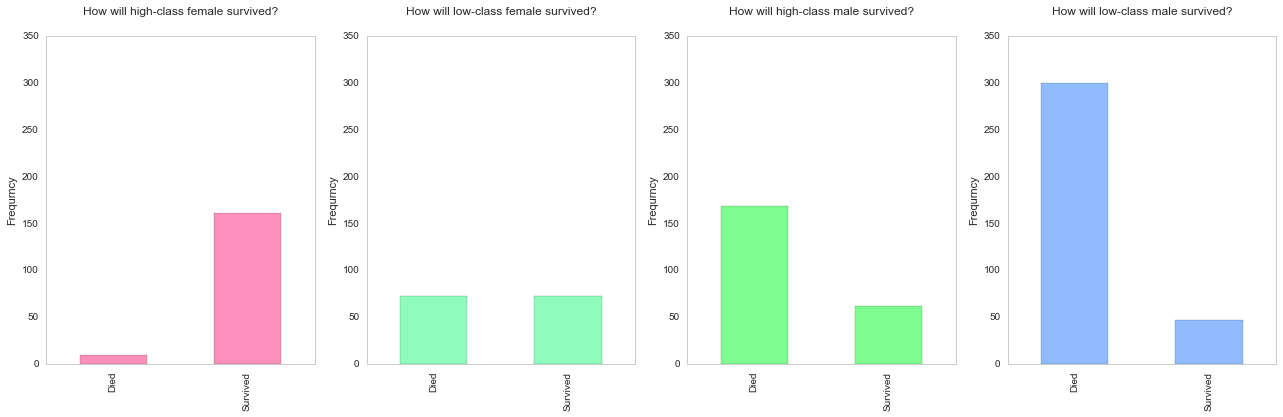

In [8]:
#class vs survival
df_male = training[training.Sex=='male']
df_female = training[training.Sex=='female']
fig = plt.figure(figsize=(18, 6))

ax1 = plt.subplot2grid((1,4), (0,0))
df_female[df_female.Pclass<3].Survived.value_counts().sort_index().plot(kind='bar', color='#FA2379', alpha=alpha)
ax1.set_ylabel('Frequrncy')
ax1.set_ylim((0,350))
ax1.set_xticklabels(['Died', 'Survived'])
ax1.set_title("How will high-class female survived?", y=1.05)
plt.grid()

ax2 = plt.subplot2grid((1,4), (0,1))
df_female[df_female.Pclass==3].Survived.value_counts().sort_index().plot(kind='bar', color='#23FA79', alpha=alpha)
ax2.set_ylabel('Frequrncy')
ax2.set_ylim((0,350))
ax2.set_xticklabels(['Died', 'Survived'])
ax2.set_title("How will low-class female survived?", y=1.05)
plt.grid()

ax3 = plt.subplot2grid((1,4), (0,2))
df_male[df_male.Pclass<3].Survived.value_counts().sort_index().plot(kind='bar', color='#00FA23', alpha=alpha)
ax3.set_ylabel('Frequrncy')
ax3.set_ylim((0,350))
ax3.set_xticklabels(['Died', 'Survived'])
ax3.set_title("How will high-class male survived?", y=1.05)
plt.grid()

ax4 = plt.subplot2grid((1,4), (0,3))
df_male[df_male.Pclass==3].Survived.value_counts().sort_index().plot(kind='bar', color='#2379FA', alpha=alpha)
ax4.set_ylabel('Frequrncy')
ax4.set_ylim((0,350))
ax4.set_xticklabels(['Died', 'Survived'])
ax4.set_title("How will low-class male survived?", y=1.05)
plt.grid()
plt.tight_layout()

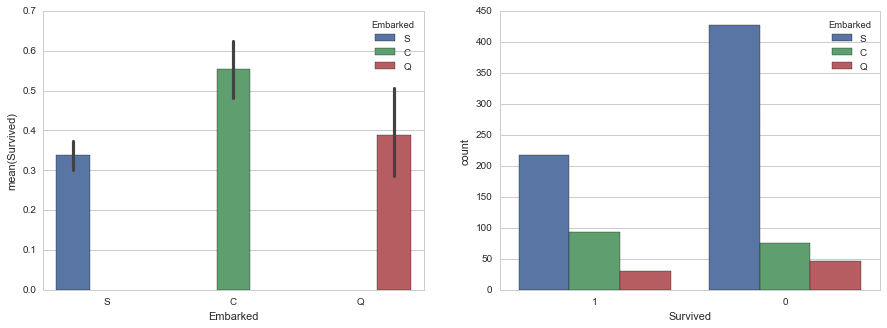

In [9]:
#Embarked

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))

sns.barplot(x ="Embarked", y = 'Survived',hue="Embarked", data=training, ax = axis1)
sns.countplot(x='Survived', hue="Embarked", data=training, order=[1,0], ax = axis2)

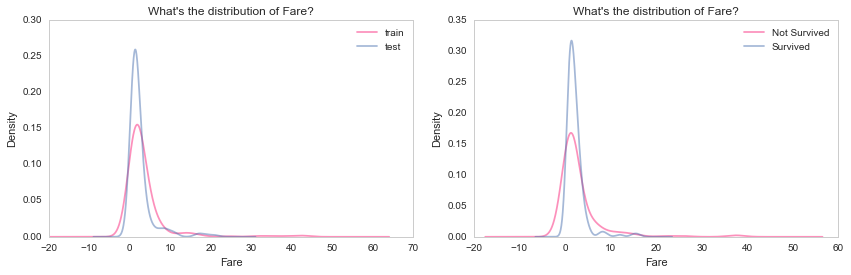

In [10]:

plt.rc('font', size=13)
fig = plt.figure(figsize=(12, 4))
alpha = 0.5

ax1 = plt.subplot2grid((1,2),(0,0))
training.Fare.value_counts().plot(kind='kde', color='#FA2379', label='train', alpha=alpha)
testing.Fare.value_counts().plot(kind='kde', label='test', alpha=alpha)
ax1.set_xlabel('Fare')
ax1.set_title("What's the distribution of Fare?" )
ax1.grid()
plt.legend(loc='best')

ax2 = plt.subplot2grid((1,2),(0,1))
training[training.Survived==0].Fare.value_counts().plot(kind='density', color='#FA2379', label='Not Survived', alpha=alpha)
training[training.Survived==1].Fare.value_counts().plot(kind='density', label='Survived', alpha=alpha)
ax2.set_xlabel('Fare')
ax2.set_title("What's the distribution of Fare?" )
plt.legend(loc='best')
plt.grid()
plt.tight_layout()

In [63]:
'''
We could see that if the value of Ticket is the same, passenger would be close, 
like friends or familes. But sometimes it will not be the case, so we need to carefully handle it.
'''
training[training.Ticket=='1601']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
74,75,1,3,"Bing, Mr. Lee",male,14,0,0,1601,56.4958,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,20,0,0,1601,56.4958,NaN,S
509,510,1,3,"Lang, Mr. Fang",male,36,0,0,1601,56.4958,NaN,S
643,644,1,3,"Foo, Mr. Choong",male,50,0,0,1601,56.4958,NaN,S
692,693,1,3,"Lam, Mr. Ali",male,61,0,0,1601,56.4958,NaN,S
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
838,839,1,3,"Chip, Mr. Chang",male,NaN,0,0,1601,56.4958,NaN,S


In [64]:
training.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [132]:
testing.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Data Cleaning

In [225]:
#training.drop("Name",axis=1,inplace=True)
#testing.drop("Name",axis=1,inplace=True)
training.drop(["Cabin", "Ticket"],axis=1,inplace=True)
testing.drop(["Cabin", "Ticket"],axis=1,inplace=True)

,Fare,Pclass,Embarked
61,80,1,NaN
829,80,1,NaN


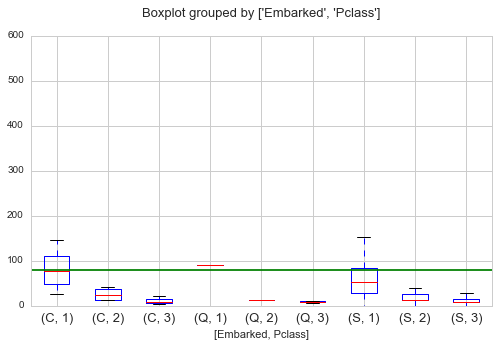

In [4]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax = training.boxplot(column='Fare', by=['Embarked','Pclass'], ax=ax)
plt.axhline(y=80, color='green')
ax.set_title('', y=1.1)

training[training.Embarked.isnull()][['Fare', 'Pclass', 'Embarked']]

In [5]:
_ = training.set_value(training.Embarked.isnull(), 'Embarked', 'C')

In [6]:
_ = testing.set_value(testing.Fare.isnull(), 'Fare', testing.Fare.median())

In [203]:
#About Cabin, method1 treat NaN as a new category, method2, classify based on pclass& Fare
'''full = pd.concat([train, test], ignore_index=True)
_ = full.set_value(full.Cabin.isnull(), 'Cabin', 'U0')'''


'''training[training.Pclass == 1].groupby(['Pclass', 'Fare', 'Cabin']).count()
training['New_cabin'] = ''
training.set_value(training[training.Pclass==3].index, 'New_cabin', "EFG" )
training.set_value(training[training.Pclass==2].index, 'New_cabin', "DEF" )'''

PassengerId  Survived  Sex  Age  SibSp  \
Pclass Fare     Cabin                                                     
1      0.0000   A36                        1         1    1    0      1   
                B102                       1         1    1    0      1   
                B94                        1         1    1    1      1   
       5.0000   B51 B53 B55                1         1    1    0      1   
       25.5875  E58                        1         1    1    1      1   
       25.9292  D17                        2         2    2    0      2   
       26.0000  A19                        1         1    1    1      1   
       26.2833  D47                        1         1    1    1      1   
       26.2875  E24                        2         2    2    2      2   
                E25                        1         1    1    1      1   
       26.3875  E25                        1         1    1    1      1   
       26.5500  B38                        1         1    1    1      1   
                C103                       1         1    1    1      1   
                C124                       1         1    1    1      1   
                C52                        1         1    1    1      1   
                C87                        1         1    1    1      1   
                E12                        1         1    1    1      1   
                E17                        1         1    1    0      1   
                E38                        1         1    1    1      1   
       27.7208  B4                         1         1    1    1      1   
       27.7500  C111                       1         1    1    1      1   
       28.5000  C124                       1         1    1    1      1   
       28.7125  C49                        1         1    1    1      1   
       29.7000  B37                        1         1    1    1      1   
                C118                       1         1    1    1      1   
                C47                        1         1    1    0      1   
       30.0000  A23                        1         1    1    1      1   
                B42                        1         1    1    0      1   
                C148                       1         1    1    0      1   
                D45                        1         1    1    0      1   
...                                      ...       ...  ...  ...    ...   
       93.5000  B69                        1         1    1    0      1   
                B73                        1         1    1    1      1   
       106.4250 C86                        1         1    1    1      1   
       108.9000 C65                        2         2    2    2      2   
       110.8833 C68                        2         2    2    2      2   
                C70                        1         1    1    1      1   
       113.2750 D36                        2         2    2    2      2   
                D48                        1         1    1    1      1   
       120.0000 B96 B98                    4         4    4    2      4   
       134.5000 E34                        1         1    1    1      1   
                E40                        1         1    1    1      1   
       135.6333 C32                        1         1    1    1      1   
                C99                        1         1    1    1      1   
       146.5208 B78                        1         1    1    1      1   
                B80                        1         1    1    1      1   
       151.5500 C22 C26                    3         3    3    3      3   
       153.4625 C125                       2         2    2    2      2   
                C91                        1         1    1    1      1   
       164.8667 C7                         1         1    1    1      1   
       211.3375 B3                         1         1    1    0      1   
                B5                         2         2    

In [7]:
# Family
training['Family'] =  training["Parch"] + training["SibSp"]
training.groupby('Family').count()
testing['Family'] =  testing["Parch"] + testing["SibSp"]

In [8]:
training = training.drop(['SibSp','Parch'], axis=1)
testing  = testing.drop(['SibSp','Parch'], axis=1)

In [213]:
set(training.Family)

{0, 1, 2, 3, 4, 5, 6, 7, 10}

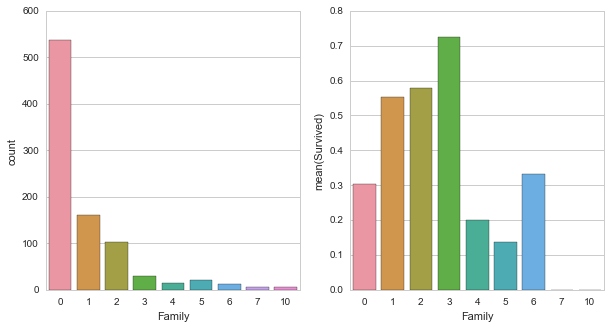

In [9]:
# plot
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

# sns.factorplot('Family',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Family', data=training, order=[0, 1, 2, 3, 4, 5, 6, 7, 10], ax=axis1)

# average of survived for those who had/didn't have any family member
family_perc = training[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[0, 1, 2, 3, 4, 5, 6, 7, 10], ax=axis2)

axis1.set_xticklabels([0, 1, 2, 3, 4, 5, 6, 7, 10], rotation=0)

In [10]:
full = pd.concat([training, testing], ignore_index=True)

In [11]:
#Names
import re
names = full.Name.map(lambda x: len(re.split(' ', x)))
_ = full.set_value(full.index, 'Names', names)
del names

In [12]:
title = full.Name.map(lambda x: re.compile(', (.*?)\.').findall(x)[0])

In [13]:
#title
title[title=='Mme'] = 'Mrs'
title[title.isin(['Ms','Mlle'])] = 'Miss'
title[title.isin(['Don', 'Jonkheer'])] = 'Sir'
title[title.isin(['Dona', 'Lady', 'the Countess'])] = 'Lady'
title[title.isin(['Capt', 'Col', 'Major', 'Dr', 'Officer', 'Rev'])] = 'Officer'
_ = full.set_value(full.index, 'Title', title)
del title

In [14]:
#Deck
_ = full.set_value(full.Cabin.isnull(), 'Cabin', 'U0')
deck = full[~full.Cabin.isnull()].Cabin.map( lambda x : re.compile("([a-zA-Z]+)").search(x).group())
deck = pd.factorize(deck)[0]
_ = full.set_value(full.index, 'Deck', deck)
del deck

In [15]:
#group_size
full['Group_size'] = pd.Series('M', index=full.index)
_ = full.set_value(full.Family>3, 'Group_size', 'L')
_ = full.set_value(full.Family==0, 'Group_size', 'S')

In [16]:
# normalize fare
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
full['NorFare'] = pd.Series(scaler.fit_transform(full.Fare.reshape(-1,1)).reshape(-1), index=full.index)

In [17]:
# change value in training & testing
def setValue(col):
    _ = training.set_value(training.index, col, full[:891][col].values)
    _ = testing.set_value(testing.index, col, full[891:][col].values)

for col in ['Deck', 'Group_size', 'NorFare', 'Names', 'Title']:
    setValue(col)

predict Age

In [18]:
full.drop(labels=['PassengerId', 'Name', 'Cabin', 'Survived', 'Ticket', 'Fare'], axis=1, inplace=True)
full = pd.get_dummies(full, columns=['Embarked', 'Sex', 'Title', 'Group_size'])

In [37]:
full.head()

,Age,Cabin,Embarked,Family,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Names,Title,Deck,Group_size,NorFare
0,22,U0,S,1,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,4,Mr,0,M,-0.503291
1,38,C85,C,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,7,Mrs,1,M,0.734744
2,26,U0,S,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,3,Miss,0,S,-0.490240
3,35,C123,S,1,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,7,Mrs,1,M,0.383183
4,35,U0,S,0,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,4,Mr,0,S,-0.487824


In [21]:
from sklearn.model_selection import train_test_split
X = full[~full.Age.isnull()].drop('Age', axis=1)
y = full[~full.Age.isnull()].Age
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [24]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
def get_model(estimator, parameters, X_train, y_train, scoring):  
    model = GridSearchCV(estimator, param_grid=parameters, scoring=scoring)
    model.fit(X_train, y_train)
    return model.best_estimator_

In [25]:
import xgboost as xgb

XGB = xgb.XGBRegressor(max_depth=4, seed= 42)
scoring = make_scorer(mean_absolute_error, greater_is_better=False)
parameters = {'reg_alpha':np.linspace(0.1,1.0,5), 'reg_lambda': np.linspace(1.0,3.0,5)}
reg_xgb = get_model(XGB, parameters, X_train, y_train, scoring)
print (reg_xgb)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0.10000000000000001,
       reg_lambda=3.0, scale_pos_weight=1, seed=42, silent=True,
       subsample=1)


In [26]:
print ("Mean absolute error of test data: {}".format(mean_absolute_error(y_test, reg_xgb.predict(X_test))))

Mean absolute error of test data: 7.90107312496


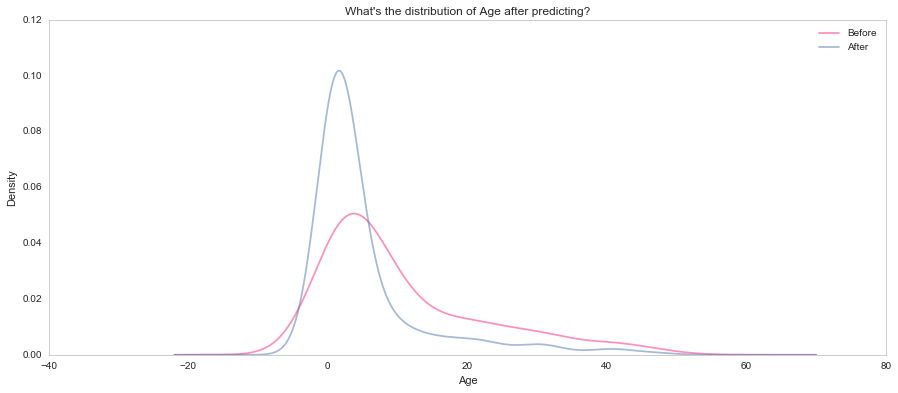

In [27]:
fig = plt.figure(figsize=(15, 6))
alpha = 0.5
full.Age.value_counts().plot(kind='density', color='#FA2379', label='Before', alpha=alpha)

pred = reg_xgb.predict(full[full.Age.isnull()].drop('Age', axis=1))
full.set_value(full.Age.isnull(), 'Age', pred)

full.Age.value_counts().plot(kind='density', label='After', alpha=alpha)
plt.xlabel('Age')
plt.title("What's the distribution of Age after predicting?" )
plt.legend(loc='best')
plt.grid()

In [28]:
full['NorAge'] = pd.Series(scaler.fit_transform(full.Age.reshape(-1,1)).reshape(-1), index=full.index)
full['NorNames'] = pd.Series(scaler.fit_transform(full.Names.reshape(-1,1)).reshape(-1), index=full.index)
full['Group_num'] = pd.Series(scaler.fit_transform(full.Family.reshape(-1,1)).reshape(-1), index=full.index)

/Users/Lesley/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [30]:
for col in ['NorAge', 'NorFare', 'NorNames', 'Family']:
    setValue(col)


In [32]:
training.Sex = np.where(training.Sex=='female', 0, 1)
testing.Sex = np.where(testing.Sex=='female', 0, 1)

In [36]:
training.drop(labels=['PassengerId', 'Name', 'Names', 'Cabin', 'Ticket', 'Age', 'Fare'], axis=1, inplace=True)
testing.drop(labels=['Name', 'Names', 'Cabin', 'Ticket', 'Age', 'Fare'], axis=1, inplace=True)
training = pd.get_dummies(training, columns=['Embarked', 'Pclass', 'Title', 'Group_size'])
testing = pd.get_dummies(testing, columns=['Embarked', 'Pclass', 'Title', 'Group_size'])
testing['Title_Sir'] = pd.Series(0, index=testing.index)

# Build Model

In [37]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    plt.figure(figsize=(10,6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring,
                                                            n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [39]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(estimator, X, y, title):
    # Determine the false positive and true positive rates
    fpr, tpr, _ = roc_curve(y, estimator.predict_proba(X)[:,1])

    # Calculate the AUC
    roc_auc = auc(fpr, tpr)
    print ('ROC AUC: %0.2f' % roc_auc)

    # Plot of a ROC curve for a specific class
    plt.figure(figsize=(10,6))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - {}'.format(title))
    plt.legend(loc="lower right")
    plt.show()

In [40]:
X = training.drop(['Survived'], axis=1)
y = training.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [41]:
from sklearn.metrics import accuracy_score
scoring = make_scorer(accuracy_score, greater_is_better=True)

KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(weights='uniform')
parameters = {'n_neighbors':[3,4,5], 'p':[1,2]}
clf_knn = get_model(KNN, parameters, X_train, y_train, scoring)

0.775784753363
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=1,
           weights='uniform')


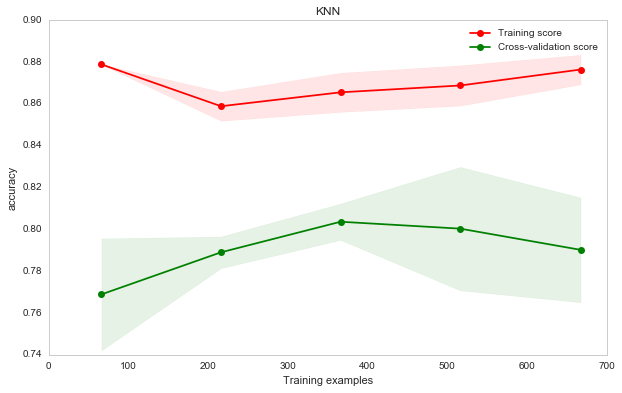

In [43]:
print (accuracy_score(y_test, clf_knn.predict(X_test)))
print (clf_knn)
plot_learning_curve(clf_knn, 'KNN', X, y, cv=4);

Random Forest

0.829596412556
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=12,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=True, random_state=42,
            verbose=0, warm_start=False)


<module 'matplotlib.pyplot' from '/Users/Lesley/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

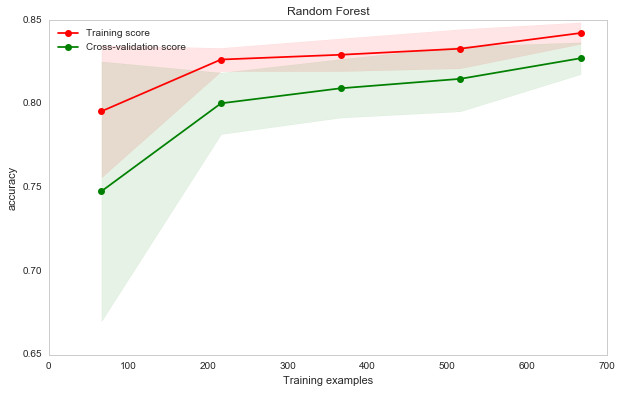

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, criterion='entropy', min_samples_split=5, oob_score=True)
parameters = {'n_estimators':[500], 'min_samples_leaf':[12]}
clf_rfc1 = get_model(rfc, parameters, X_train, y_train, scoring)
print (accuracy_score(y_test, clf_rfc1.predict(X_test)))
print (clf_rfc1)
plot_learning_curve(clf_rfc1, 'Random Forest', X, y, cv=4)

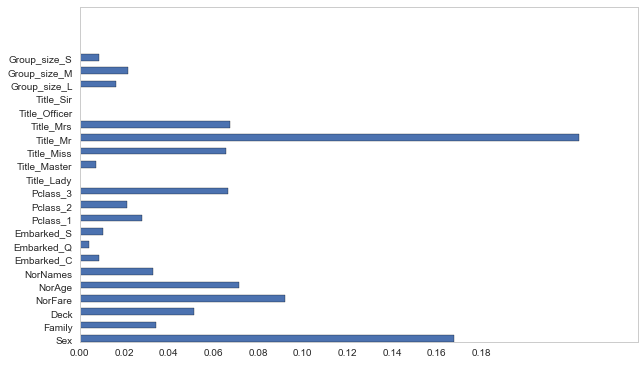

In [51]:
plt.figure(figsize=(10,6))
plt.barh(np.arange(X_train.columns.shape[0]), clf_rfc1.feature_importances_, 0.5)
plt.yticks(np.arange(X_train.columns.shape[0]), X_train.columns)
plt.grid()
plt.xticks(np.arange(0,0.2,0.02))


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=12,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=True, random_state=42,
            verbose=0, warm_start=False)
0.834080717489


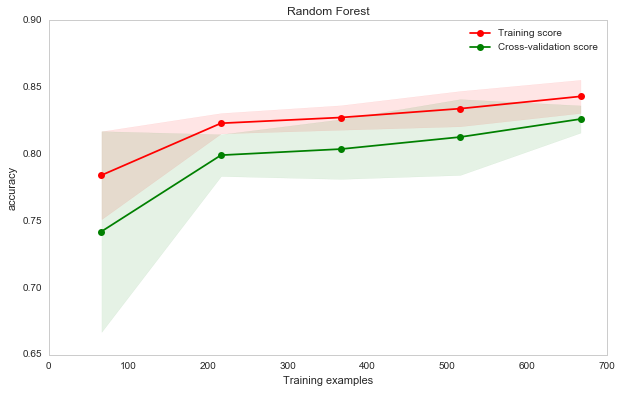

In [52]:
cols = X_train.columns[clf_rfc1.feature_importances_>=0.016]
rfc = RandomForestClassifier(random_state=42, criterion='entropy', min_samples_split=5, oob_score=True)
parameters = {'n_estimators':[500], 'min_samples_leaf':[12]}
clf_rfc2 = get_model(rfc, parameters, X_train[cols], y_train, scoring)
print (clf_rfc2)
print (accuracy_score(y_test, clf_rfc2.predict(X_test[cols])))
plot_learning_curve(clf_rfc2, 'Random Forest', X[cols], y, cv=4);

Logistic Regression

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.811659192825


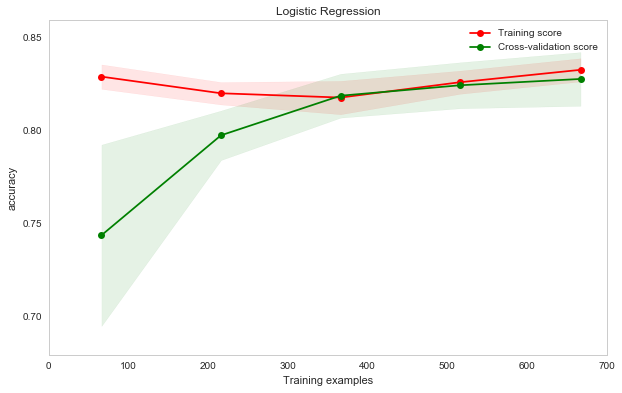

In [53]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=42, penalty='l1')
parameters = {'C':[0.5]}
clf_lg1 = get_model(lg, parameters, X_train, y_train, scoring)
print (clf_lg1)
print (accuracy_score(y_test, clf_lg1.predict(X_test)))
plot_learning_curve(clf_lg1, 'Logistic Regression', X, y, cv=4);

SVC

SVC(C=35, cache_size=200, class_weight=None, coef0=0.1,
  decision_function_shape=None, degree=2, gamma=0.0055, kernel='poly',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.838565022422


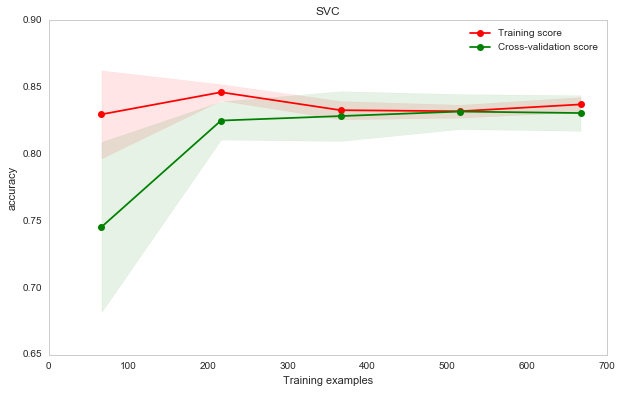

In [54]:
from sklearn.svm import SVC
svc = SVC(random_state=42, kernel='poly', probability=True)
parameters = {'C': [35], 'gamma': [0.0055], 'coef0': [0.1],
              'degree':[2]}
clf_svc = get_model(svc, parameters, X_train, y_train, scoring)
print (clf_svc)
print (accuracy_score(y_test, clf_svc.predict(X_test)))
plot_learning_curve(clf_svc, 'SVC', X, y, cv=4);


XGB

0.829596412556
XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=400, nthread=-1,
       objective='binary:logistic', reg_alpha=3.0, reg_lambda=4.0,
       scale_pos_weight=1, seed=42, silent=True, subsample=1)


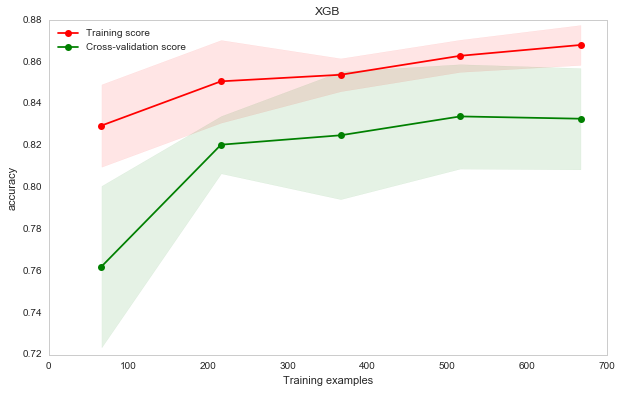

In [55]:
xgb1 = xgb.XGBClassifier(seed=42, max_depth=3, objective='binary:logistic', n_estimators=400)
parameters = {'learning_rate':[0.1],
              'reg_alpha':[3.0], 'reg_lambda': [4.0]}
clf_xgb1 = get_model(xgb1, parameters, X_train, y_train, scoring)
print (accuracy_score(y_test, clf_xgb1.predict(X_test)))
print (clf_xgb1)
plot_learning_curve(clf_xgb1, 'XGB', X, y, cv=4);

Ensemble

0.829596412556
VotingClassifier(estimators=[('xgb1', XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=400, nthread=-1,
       objective='binary:logistic', reg_alpha=3.0, reg_lambda=4.0,
    ...owski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=1,
           weights='uniform'))],
         n_jobs=1, voting='hard', weights=[4, 1, 1, 1, 1, 2])


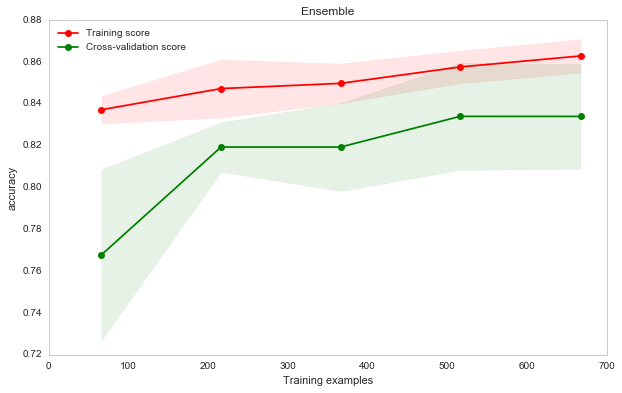

In [56]:
from sklearn.ensemble import VotingClassifier
clf_vc = VotingClassifier(estimators=[('xgb1', clf_xgb1), ('lg1', clf_lg1), ('svc', clf_svc), 
                                      ('rfc1', clf_rfc1),('rfc2', clf_rfc2), ('knn', clf_knn)], 
                          voting='hard', weights=[4,1,1,1,1,2])
clf_vc = clf_vc.fit(X_train, y_train)
print (accuracy_score(y_test, clf_vc.predict(X_test)))
print (clf_vc)
plot_learning_curve(clf_vc, 'Ensemble', X, y, cv=4);

In [ ]:
PassengerId = test.PassengerId
test.drop('PassengerId', axis=1, inplace=True)
def submission(model, fname, X):
    ans = pd.DataFrame(columns=['PassengerId', 'Survived'])
    ans.PassengerId = PassengerId
    ans.Survived = pd.Series(model.predict(X), index=ans.index)
    ans.to_csv(fname, index=False)